In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


In [8]:
path="/Users/home/Desktop/Rao_labs/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(path)

In [10]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [12]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result
#Products in category'women' have the most best sellers but the quantity is large;

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [14]:
from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value
# best-seller distribution is dependent of the product category

(36540.20270061387, 0.0)

In [16]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the ""cramer"" method
association(crosstab_result, method='cramer')
#Cramer's V shows that the strength is quite low

0.1222829439760564

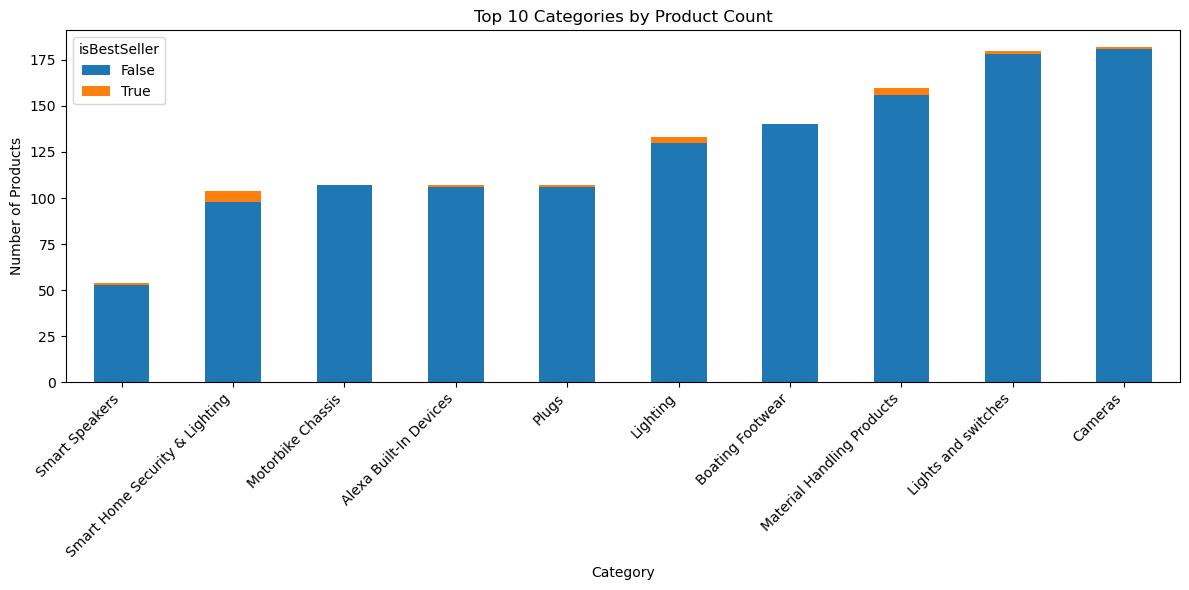

In [24]:
top_categories=crosstab_result.sum(axis=1).sort_values(ascending=True).head(10).index
filtered_crosstab=crosstab_result.loc[top_categories]
#plot
filtered_crosstab.plot(kind='bar',stacked=True,figsize=(12,6))
plt.title("Top 10 Categories by Product Count")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
iqr=q3-q1

In [34]:
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df_no_outliers=df[(df['price']>=lower_bound) & (df['price']<=upper_bound)]

In [62]:
top_20=df_no_outliers['category'].value_counts().head(20).index
top_20

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

In [64]:
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top_20)]

/var/folders/hv/sgj9c8cn0ql8vfb3lx01lzbr0000gn/T/ipykernel_26573/142054057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top20, x='category', y='price', palette="coolwarm")


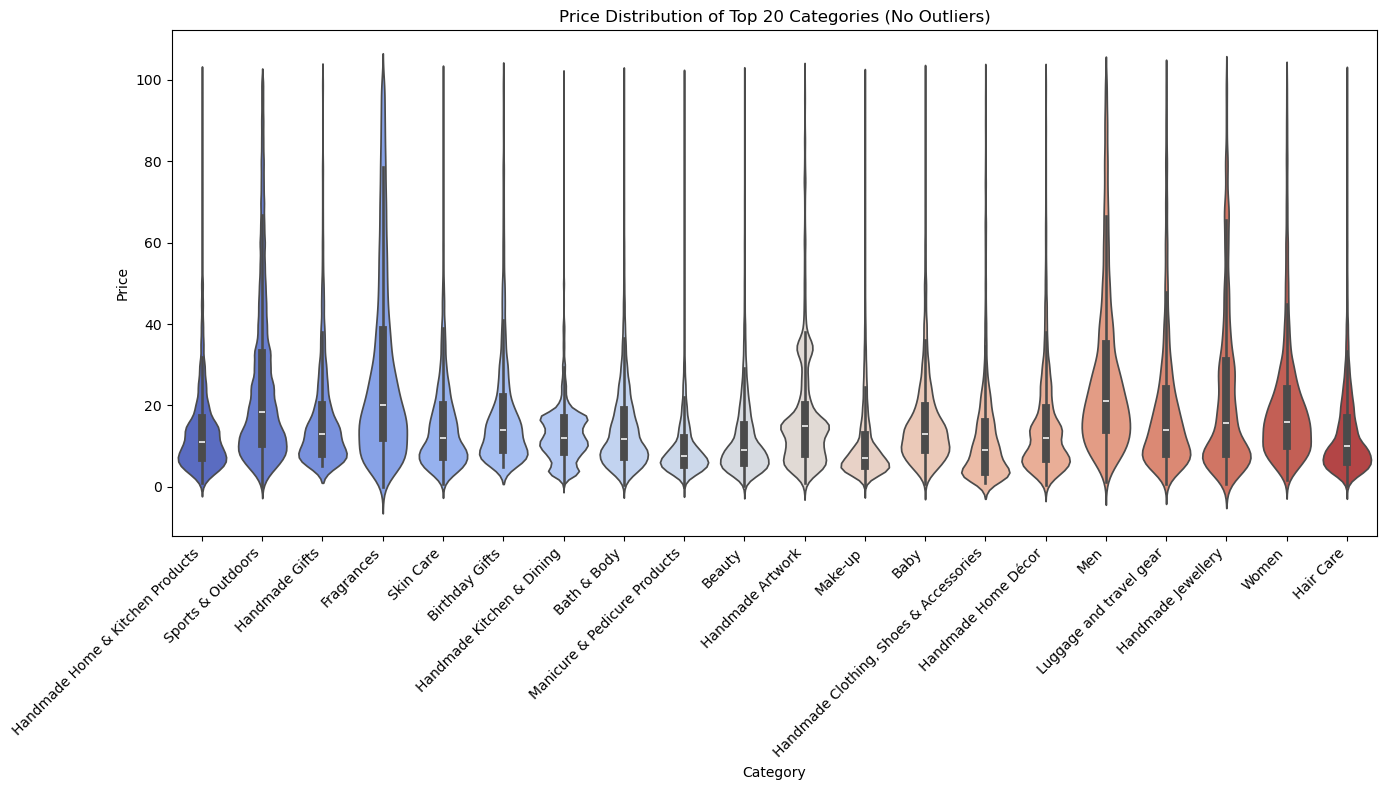

In [66]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top20, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Price Distribution of Top 20 Categories (No Outliers)")
plt.xlabel("Category")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [92]:
top10=df_no_outliers['category'].value_counts().head(10).index

In [94]:
top10

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts'],
      dtype='object', name='category')

In [100]:
df_top10=df_no_outliers[df_no_outliers['category'].isin(top10)]
df_top10

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [106]:
avg_price_by_cat=df_top10.groupby('category')['price'].mean().sort_values(ascending=False)
avg_price_by_cat

category
Sports & Outdoors                         25.172065
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Skin Care                                 15.654722
Bath & Body                               14.678683
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Beauty                                    12.523480
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Name: price, dtype: float64

/var/folders/hv/sgj9c8cn0ql8vfb3lx01lzbr0000gn/T/ipykernel_26573/520488150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_cat.index,y=avg_price_by_cat.values,palette='Set3')


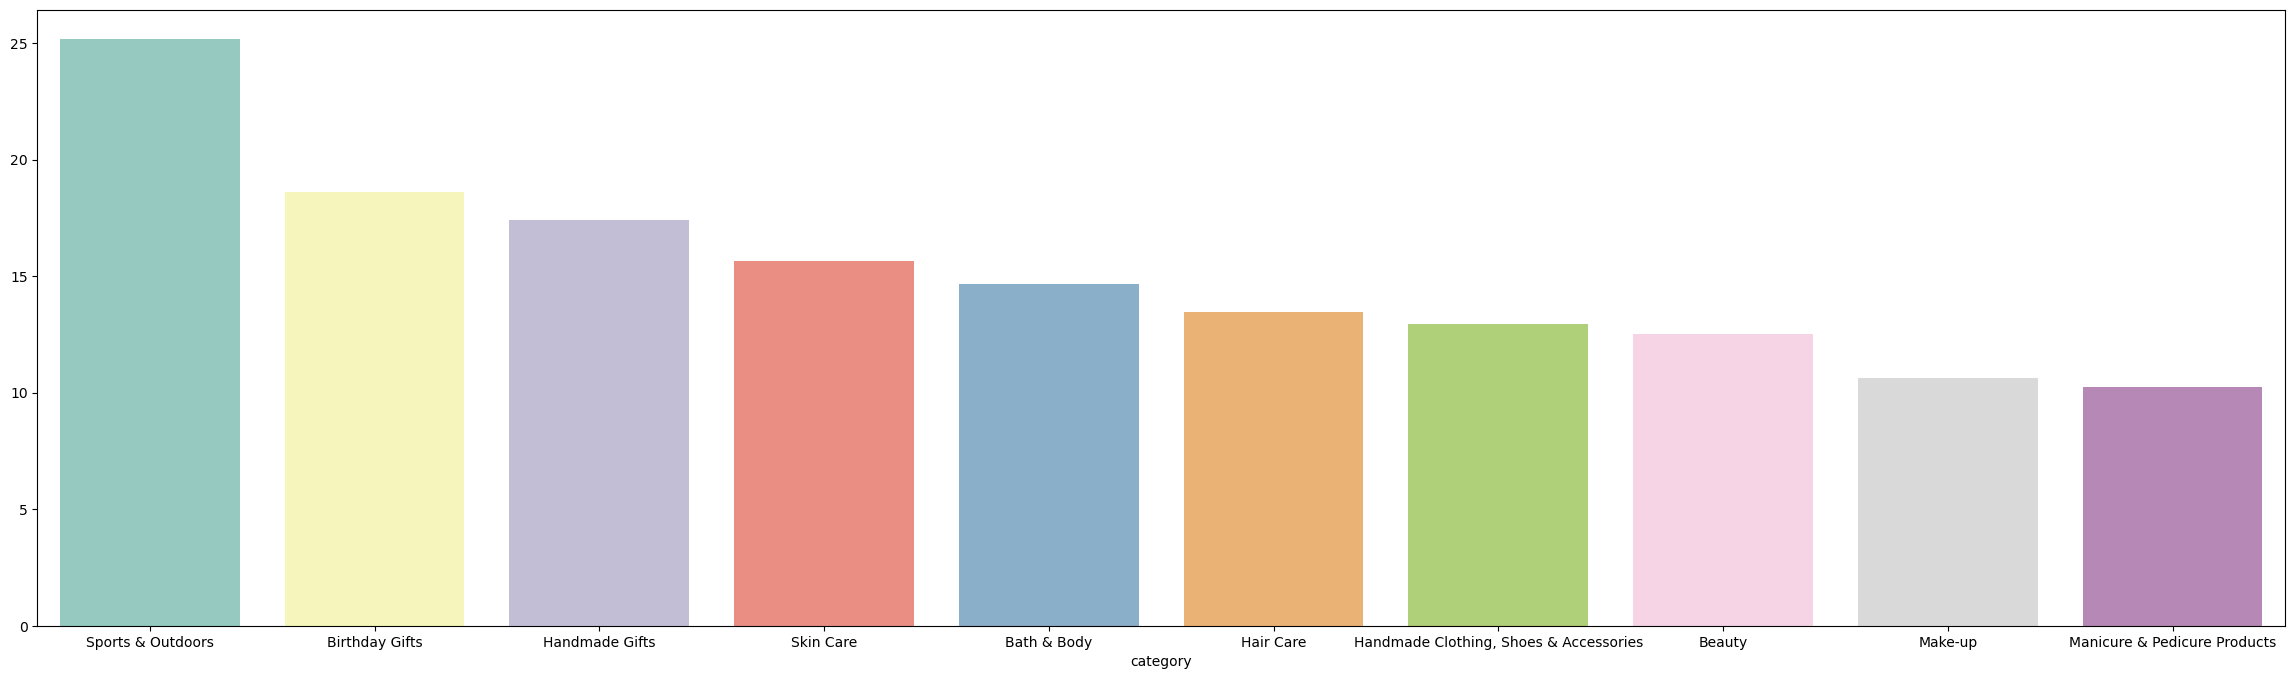

In [114]:
plt.figure(figsize=(29, 8))
sns.barplot(x=avg_price_by_cat.index,y=avg_price_by_cat.values,palette='Set3')
plt.show()
#Sports & outdoors commands the highest average price

/var/folders/hv/sgj9c8cn0ql8vfb3lx01lzbr0000gn/T/ipykernel_26573/2962196915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='category', y='stars', palette="coolwarm")


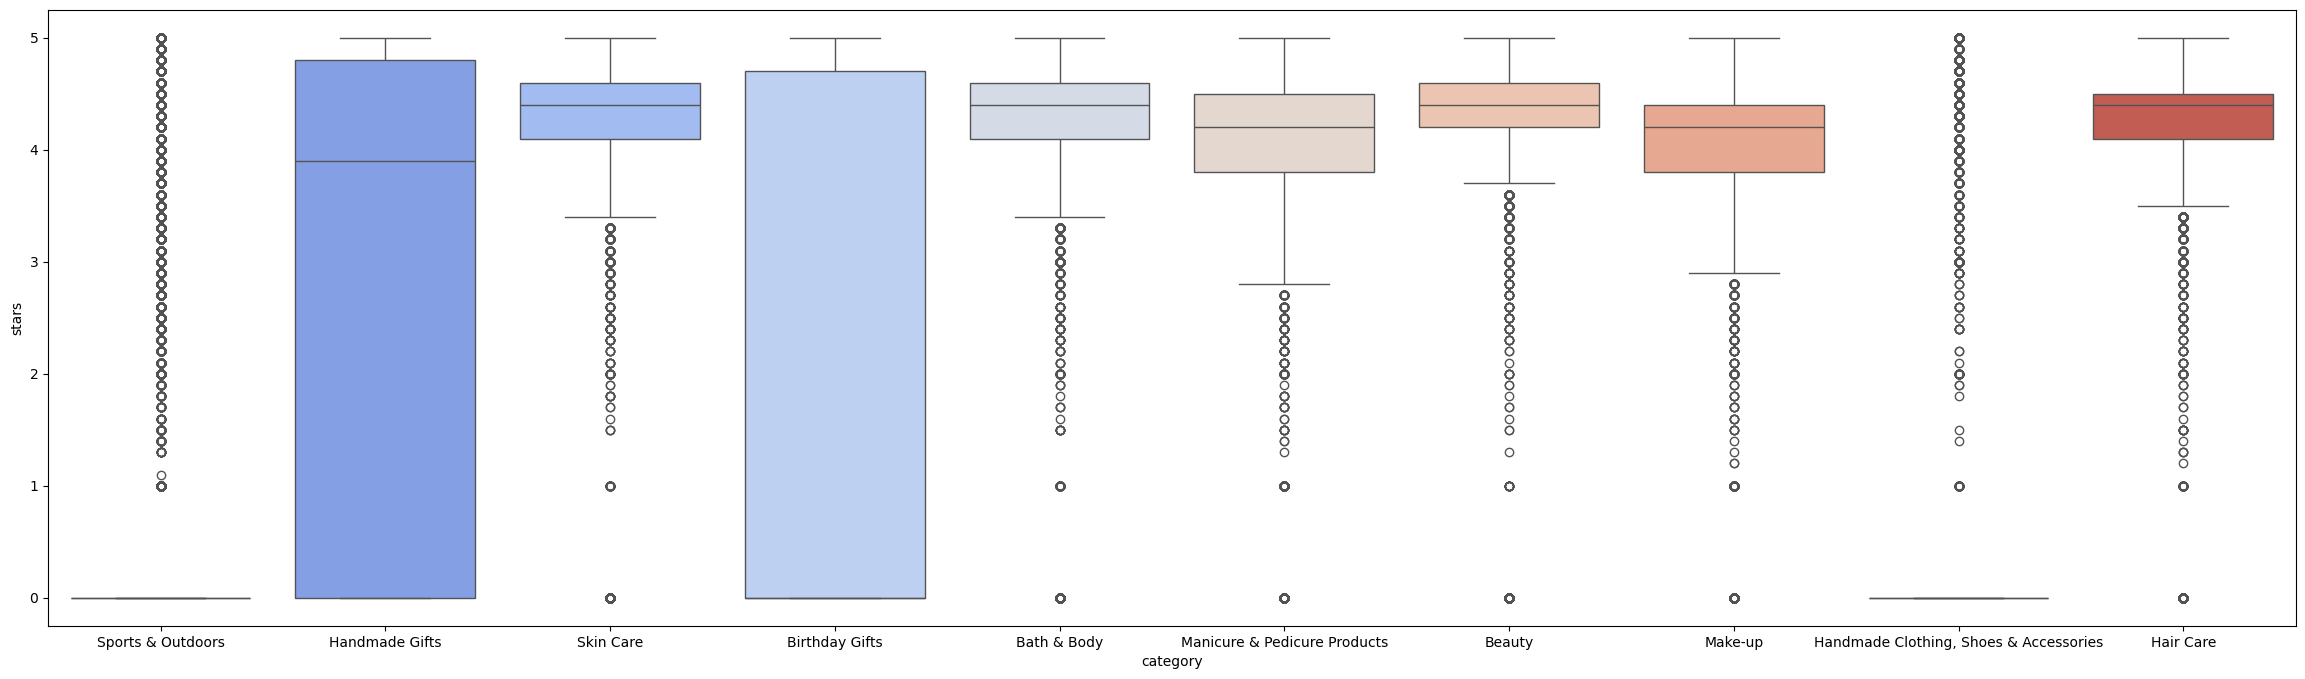

In [120]:
#Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
plt.figure(figsize=(29, 8))
sns.boxplot(data=df_top10, x='category', y='stars', palette="coolwarm")
plt.show()
#manicure and pedicure products have the highest median rating

In [126]:
correlation = df_no_outliers['stars'].corr(df_no_outliers['price'])
correlation


-0.07767299878181445

In [132]:
crosstab_result_2 = pd.crosstab(df_no_outliers['stars'], df_no_outliers['price'])


In [134]:
from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic_2, chi2_p_value_2, _, _ = chi2_contingency(crosstab_result_2)

chi2_statistic_2, chi2_p_value_2
#significant negative relationship between star and price

(662382.0835902255, 0.0)

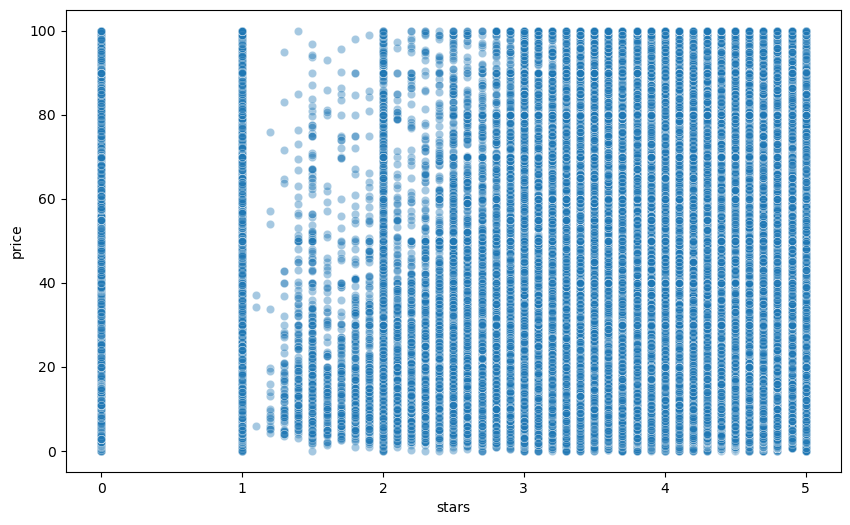

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='stars', y='price', alpha=0.4)


plt.show()

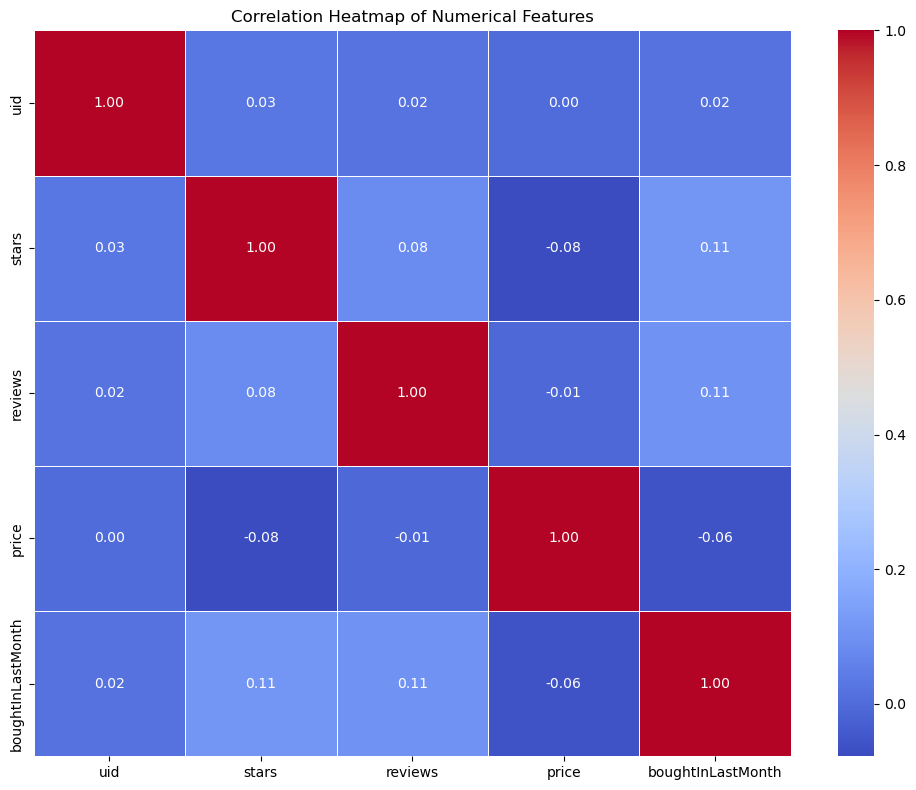

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numerical columns
numerical_df = df_no_outliers.select_dtypes(include='number')

# Step 2: Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


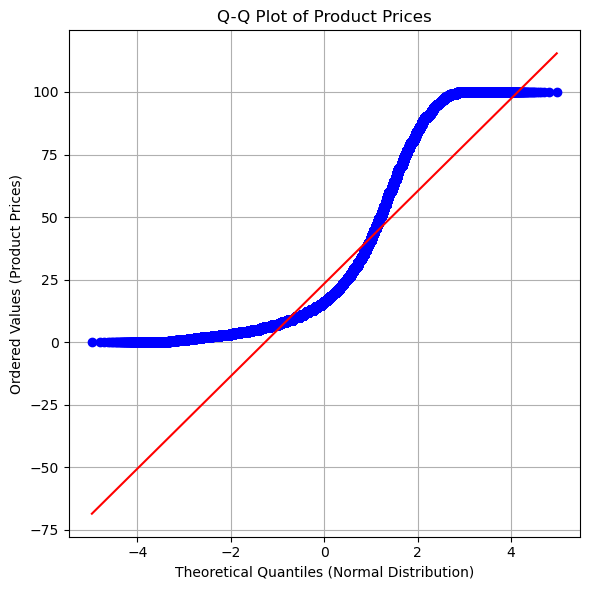

In [140]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Select the price data (remove NaNs if necessary)
price_data = df_no_outliers['price'].dropna()

# Step 2: Create a Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(price_data, dist="norm", plot=plt)

plt.title("Q-Q Plot of Product Prices")
plt.xlabel("Theoretical Quantiles (Normal Distribution)")
plt.ylabel("Ordered Values (Product Prices)")
plt.grid(True)
plt.tight_layout()
plt.show()
